# Importing Libraries

In [1]:
# Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split

# Classification Model Building
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Regression Model Building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Classification Model Performance Testing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Miscellaneous
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

# IBM Watson Cloud
from ibm_watson_machine_learning import APIClient
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

# Data Collection

In [2]:
# df=pd.read_csv(r"C:\Users\Gobi J\Downloads\Prediction Model\Prediction Model\Dataset\Placement Data Full Class.csv")
# df

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dzNfYmFMf8SrfNpHYpOAfUbwsBZ1E2WnPGYEGmDYM474',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'campusplacement-donotdelete-pr-jbrafwdvryvmn0'
object_key = 'Placement Data Full Class.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Preparation

## Dropping Unwanted Feature

In [3]:
df.drop('sl_no',axis=1,inplace=True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Handling Missing Values

In [4]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<AxesSubplot:>

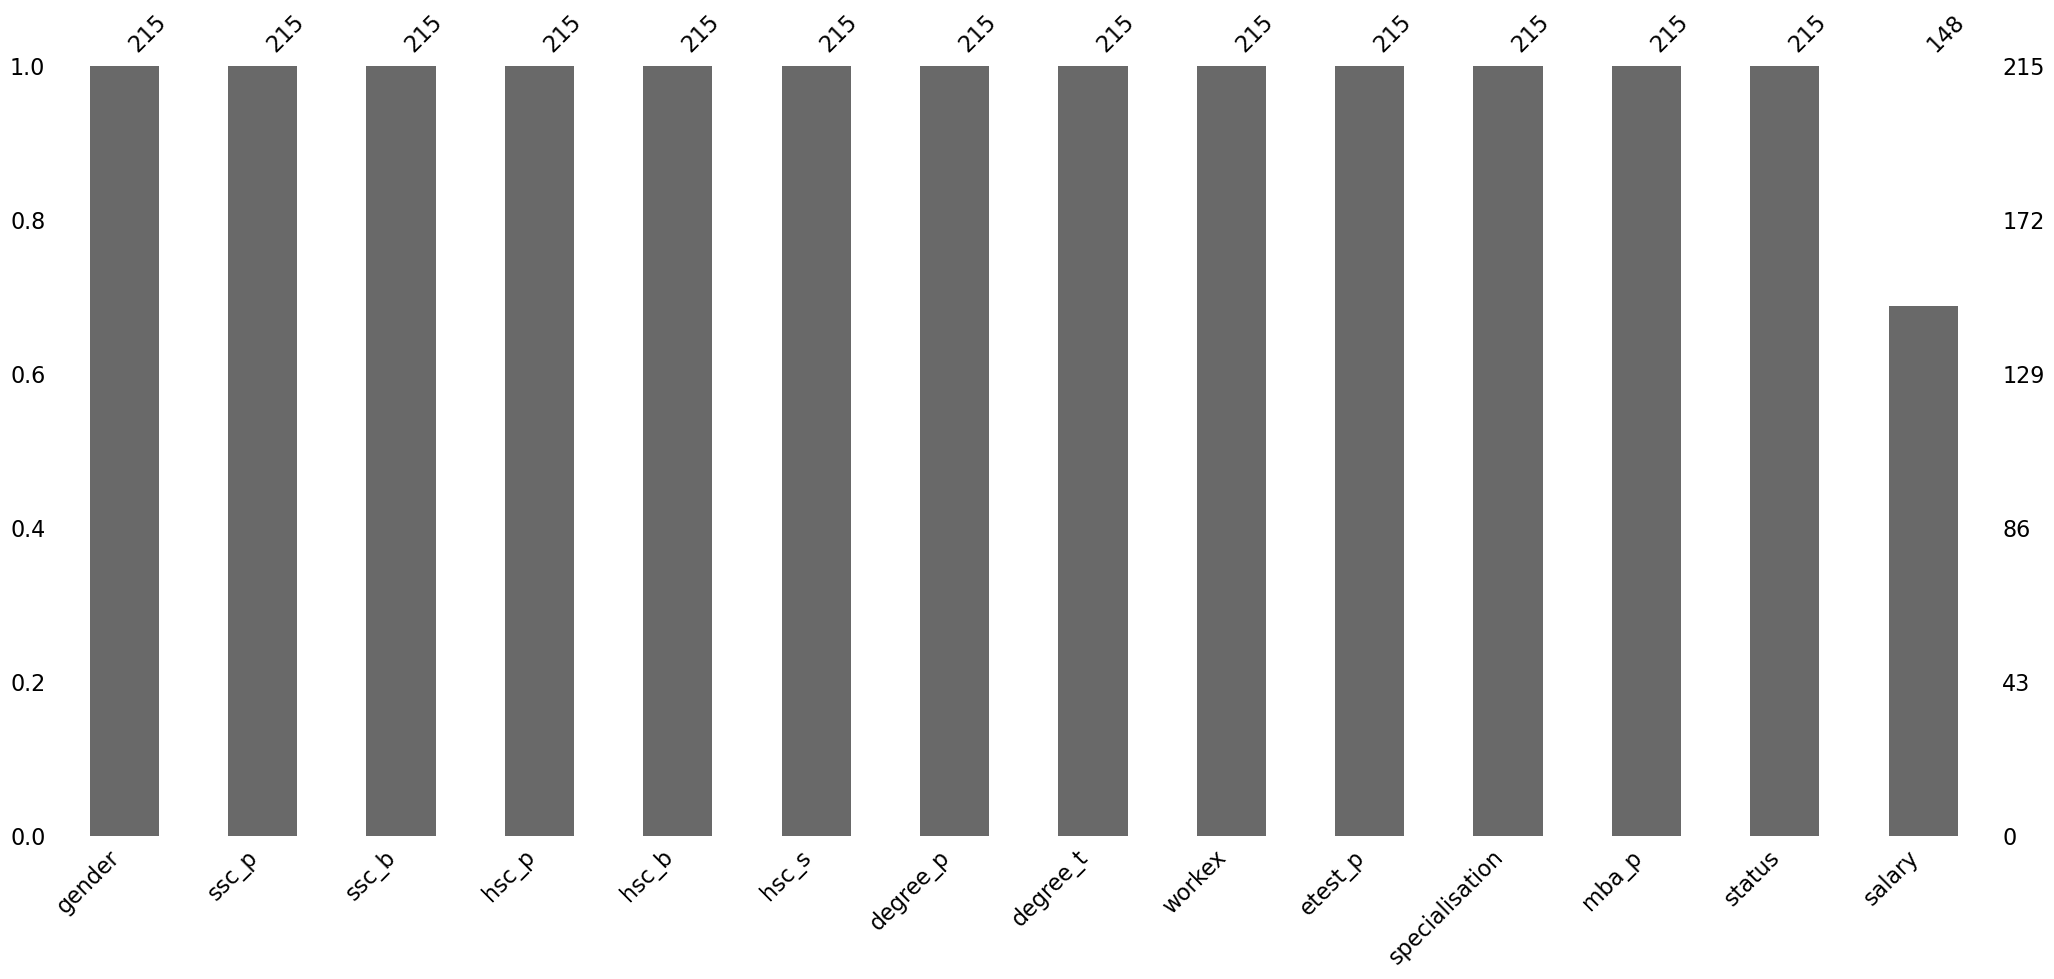

In [5]:
msn.bar(df)

Since students who didn't get placed will not have salary column populated for them. Hence, salary column is imputed with 0 for missing value.

In [6]:
df.fillna(value = 0, inplace =True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Feature Selection

### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

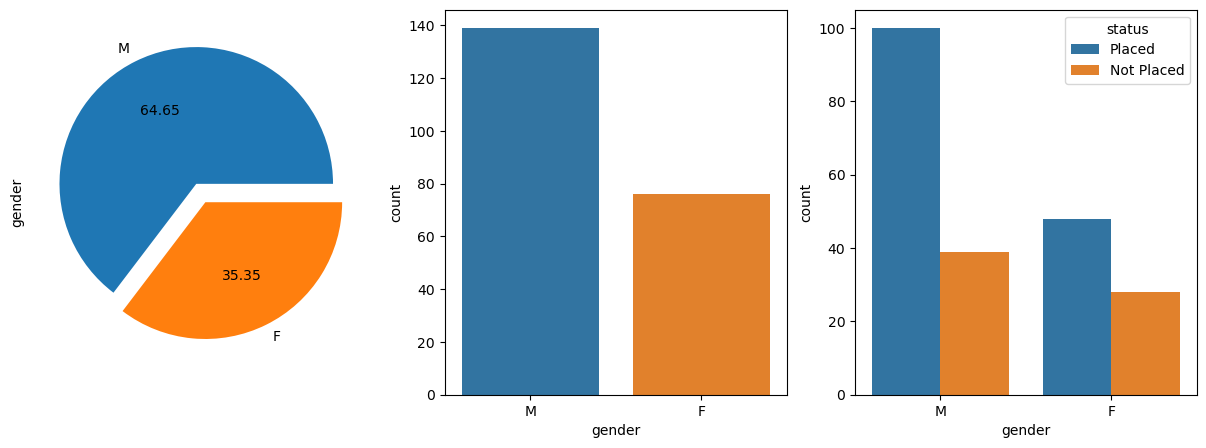

In [7]:
plt.figure(figsize = (15,5))
explode = [0.15,0]
plt.subplot(131)
df['gender'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'gender')
plt.subplot(133)
sns.countplot(data=df,x='gender',hue='status')

In [8]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

Text(0.5, 0, 'Salary (100k)')

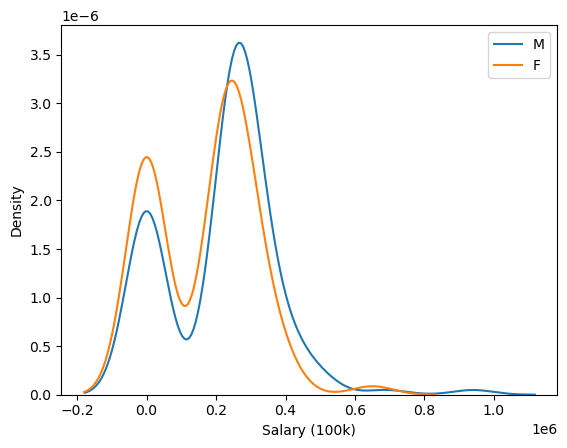

In [9]:
sns.kdeplot(df.salary[df.gender=='M'])
sns.kdeplot(df.salary[df.gender=='F'])
plt.legend(['M','F'])
plt.xlabel("Salary (100k)")

<AxesSubplot:xlabel='salary', ylabel='gender'>

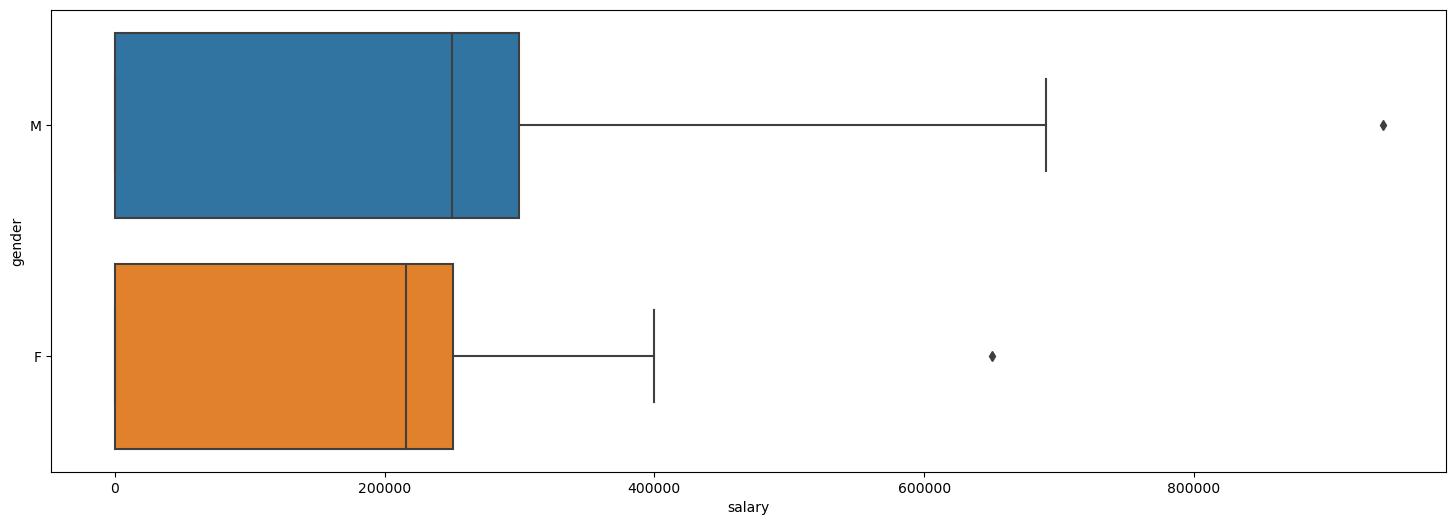

In [10]:
plt.figure(figsize=(18,6))
sns.boxplot(x="salary",y="gender",data=df)

In [11]:
df.gender[df.status=="Not Placed"].value_counts()


M    39
F    28
Name: gender, dtype: int64

**Insights**
* Gender proportion: Male ~ 65% and Female ~ 35%
* Male students have comparatively higher placemets
* Male students are offered slightly greater salary than female on an average (More outliers on Male)

### Secondary Education

<AxesSubplot:xlabel='ssc_b', ylabel='count'>

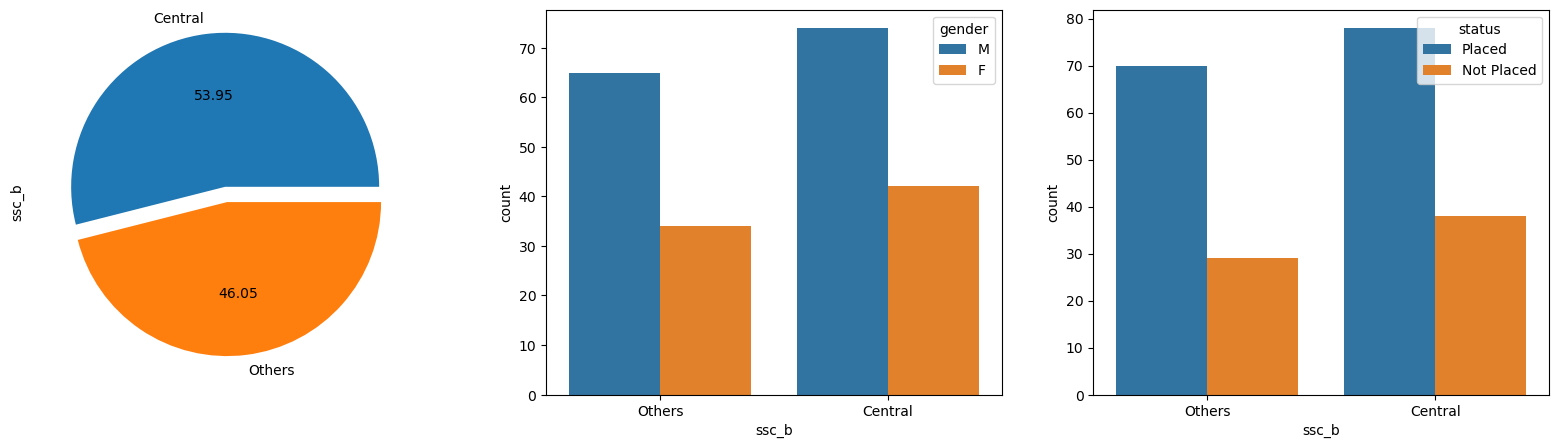

In [12]:
plt.figure(figsize = (20,5))
explode = [0.1,0]
plt.subplot(131)
df['ssc_b'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'ssc_b',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'ssc_b',hue =df['status'])

**Insights**
* Students are from 2 types of Secondary Education Boards: Central ~ 54% and Others ~ 46%
* Students from Central Board in Secondary Education have slightly higher chance of getting placed (doesn't affect Placement Status much)

Text(0.5, 0, 'Secondary Education Percentage')

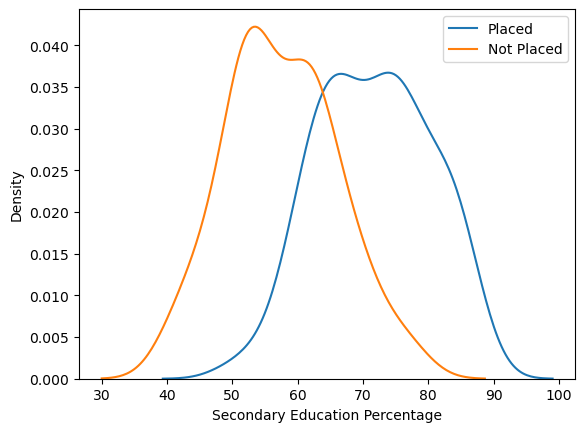

In [13]:
sns.kdeplot(df.ssc_p[df.status=='Placed'])
sns.kdeplot(df.ssc_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel('Secondary Education Percentage')


**Insights**
* All students with Secondary Education Percentage above 90% are placed
* All students with Secondary Education Percentage below 40% are not-placed
* Students with good Secondary Education Percentage are placed on average.

<AxesSubplot:xlabel='salary', ylabel='ssc_b'>

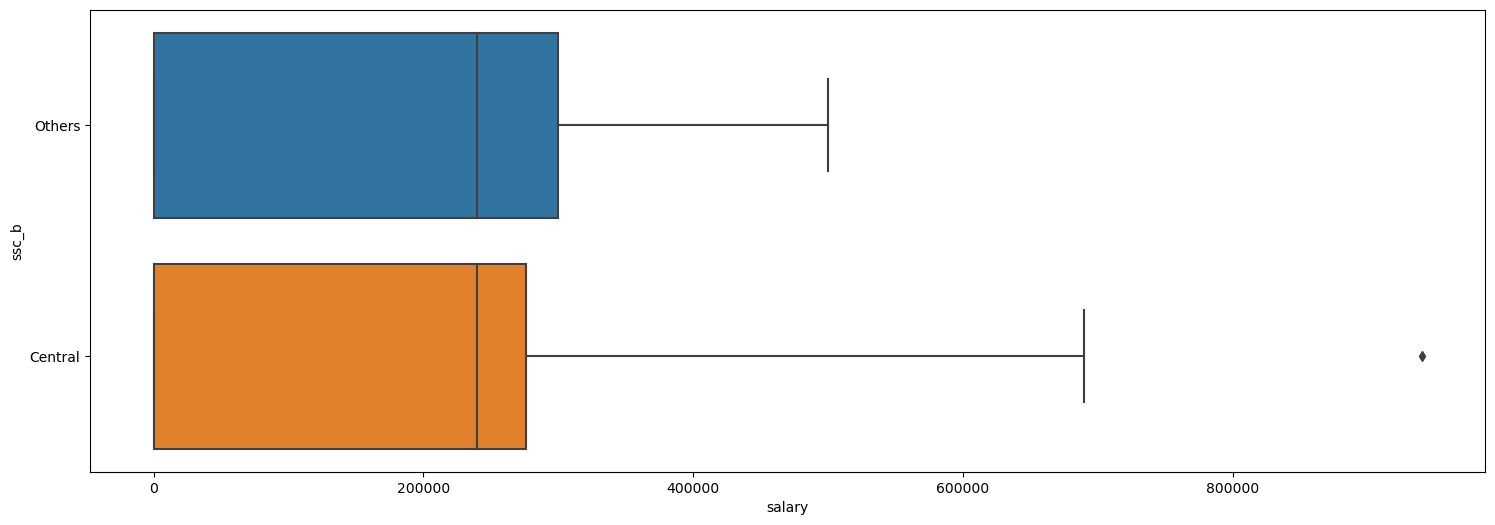

In [14]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='ssc_b',data=df)

<AxesSubplot:xlabel='ssc_p', ylabel='salary'>

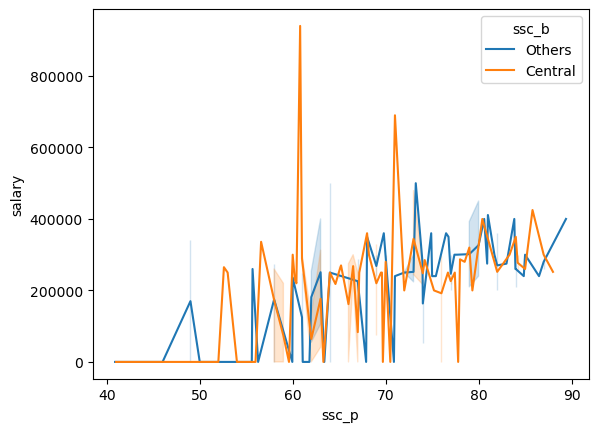

In [15]:
sns.lineplot(x="ssc_p",y="salary",hue='ssc_b',data=df)

**Insights**
* Students from Central Board are getting slightly highly paid jobs (does not affect Salary much)
* No specific correlation between Secondary Education Percentage and Salary.

### Higher Secondary Education

<AxesSubplot:xlabel='hsc_b', ylabel='count'>

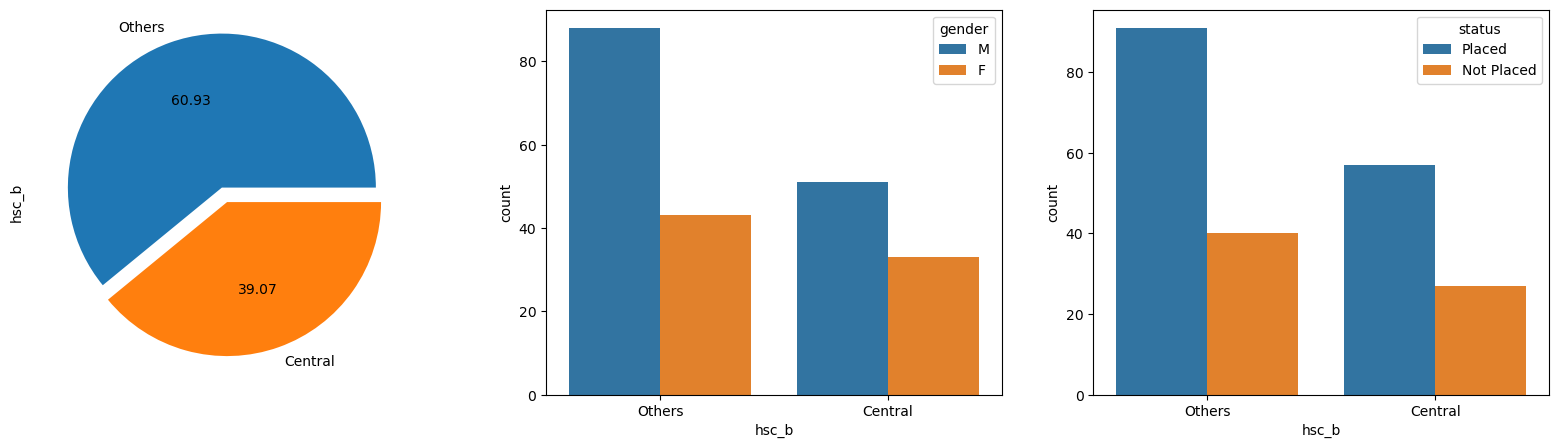

In [16]:
plt.figure(figsize = (20,5))
explode = [0.1,0]
plt.subplot(131)
df['hsc_b'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'hsc_b',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'hsc_b',hue =df['status'])

**Insights**
* Students are from 2 types of Higher Secondary Education Boards: Central ~ 61% and Others ~ 39%
* Male students strength is almost the double in Others Boards
* Students from Others Board have a slightly higher chance of getting placed (doesn't affect Placement Status much) 

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

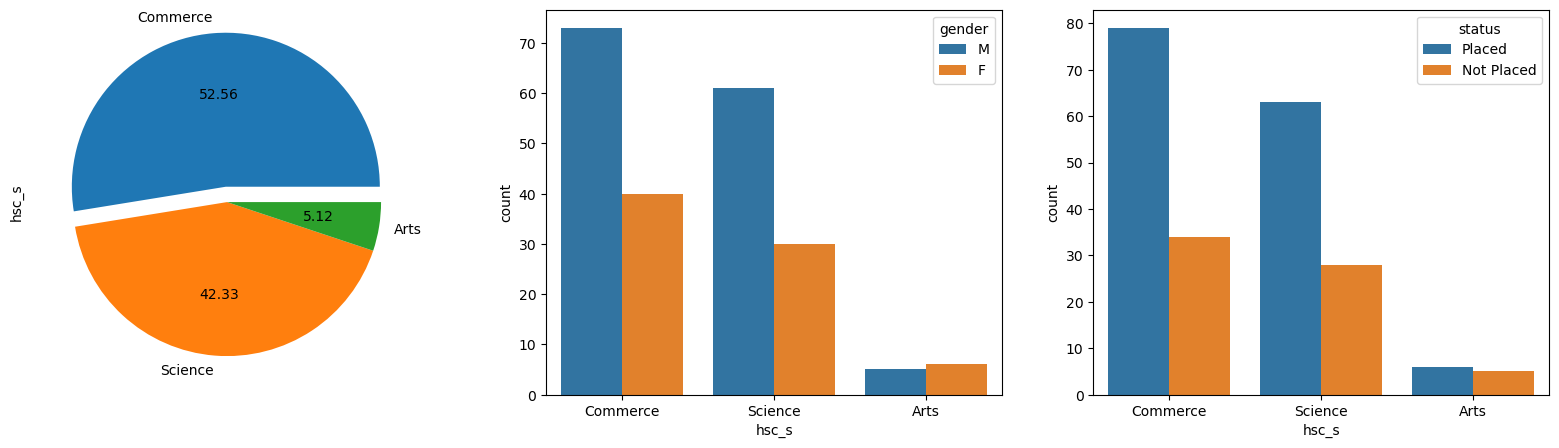

In [17]:
plt.figure(figsize = (20,5))
explode = [0.1,0,0]
plt.subplot(131)
df['hsc_s'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'hsc_s',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'hsc_s',hue =df['status'])

**Insights**
* Students are from 3 streams in Higher Secondary Education Boards: Commerce, Science, Arts
* Very less students with Arts specialization.

Text(0.5, 0, 'Higher Secondary Education Percentage')

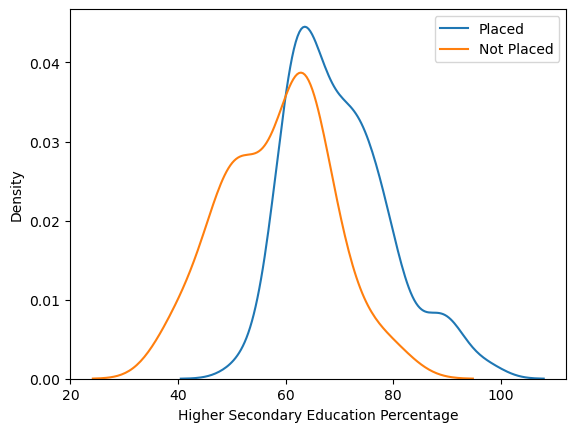

In [18]:
sns.kdeplot(df.hsc_p[df.status=='Placed'])
sns.kdeplot(df.hsc_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel("Higher Secondary Education Percentage")

**Insights**
* All students with Higher Secondary Education Percentage above 95% are placed
* All students with Higher Secondary Education Percentage below 40% are not-placed
* More placements for percentage above 65%

<AxesSubplot:xlabel='salary', ylabel='hsc_b'>

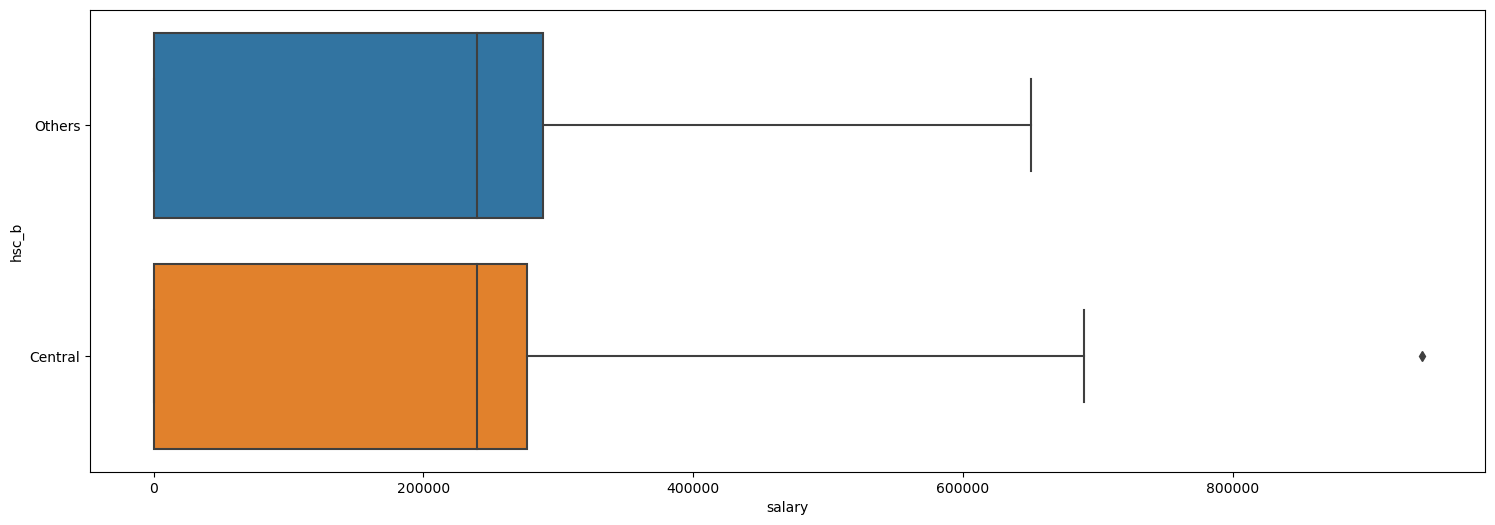

In [19]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='hsc_b',data=df)

<AxesSubplot:xlabel='salary', ylabel='hsc_s'>

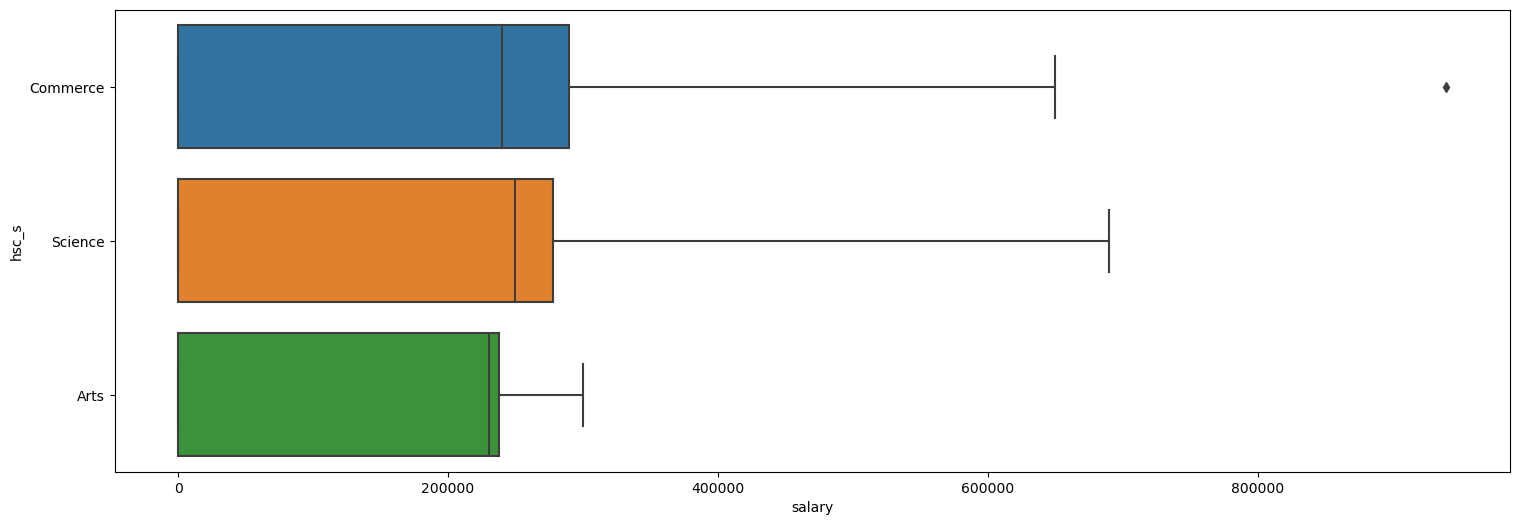

In [20]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='hsc_s',data=df)

<AxesSubplot:xlabel='hsc_p', ylabel='salary'>

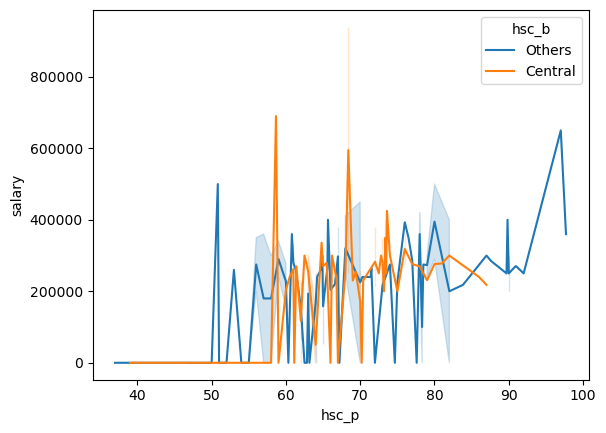

In [21]:
sns.lineplot(x='hsc_p',y='salary',hue='hsc_b',data=df)

<AxesSubplot:xlabel='hsc_p', ylabel='salary'>

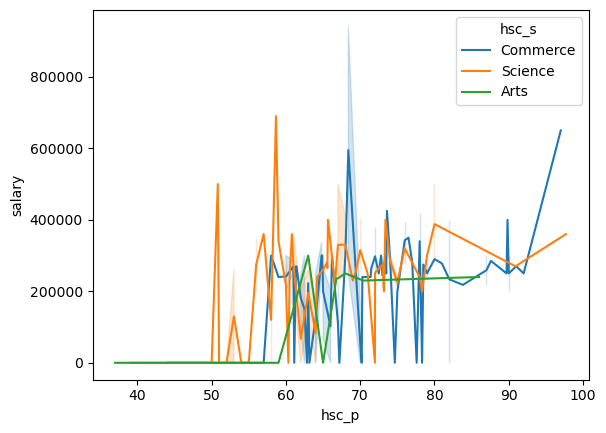

In [22]:
sns.lineplot(x='hsc_p',y='salary',hue='hsc_s',data=df)

**Insights**
* Students from Central Board are getting slightly highly paid jobs (does not affect Salary much)
* Students of Arts stream aren't getting good salaries.
* Commerse students have slightly better placement status.
* No specific correlation between Secondary Education Percentage and Salary.

### Under Graduation

<AxesSubplot:xlabel='degree_t', ylabel='count'>

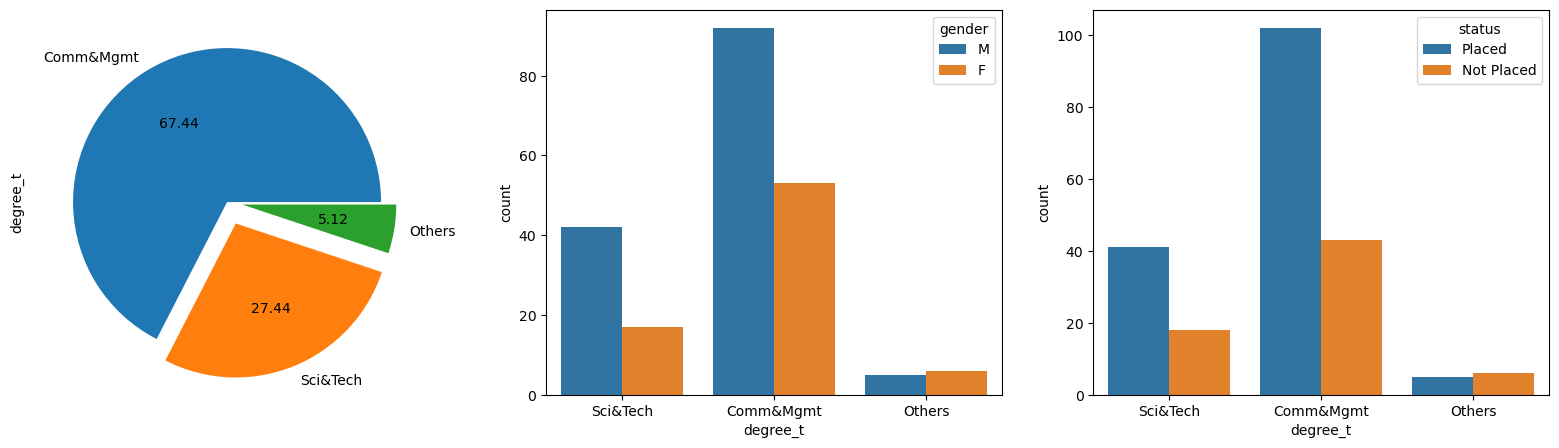

In [23]:
plt.figure(figsize = (20,5))
explode = [0,0.15,0.1]
plt.subplot(131)
df['degree_t'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'degree_t',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'degree_t',hue =df['status'])

**Insights**
* Students are from 3 types of Under Graduation Degree: Comm&Mgmt ~ 67%, Sci&Tech ~ 28% and Others ~ 5%
* Very less students with 'Others' degree 
* Placement for 'Comm & Mgmt' is high.

Text(0.5, 0, 'Under Graduate Percentage')

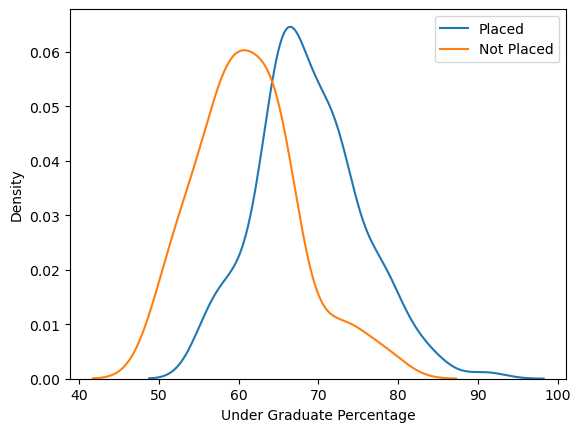

In [24]:
sns.kdeplot(df.degree_p[df.status=='Placed'])
sns.kdeplot(df.degree_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel("Under Graduate Percentage")

**Insights**
* All students with UG Percentage above 90% are placed
* All students with UG Percentage below 50% are not-placed
* More placements for percentage above 70%

<AxesSubplot:xlabel='salary', ylabel='degree_t'>

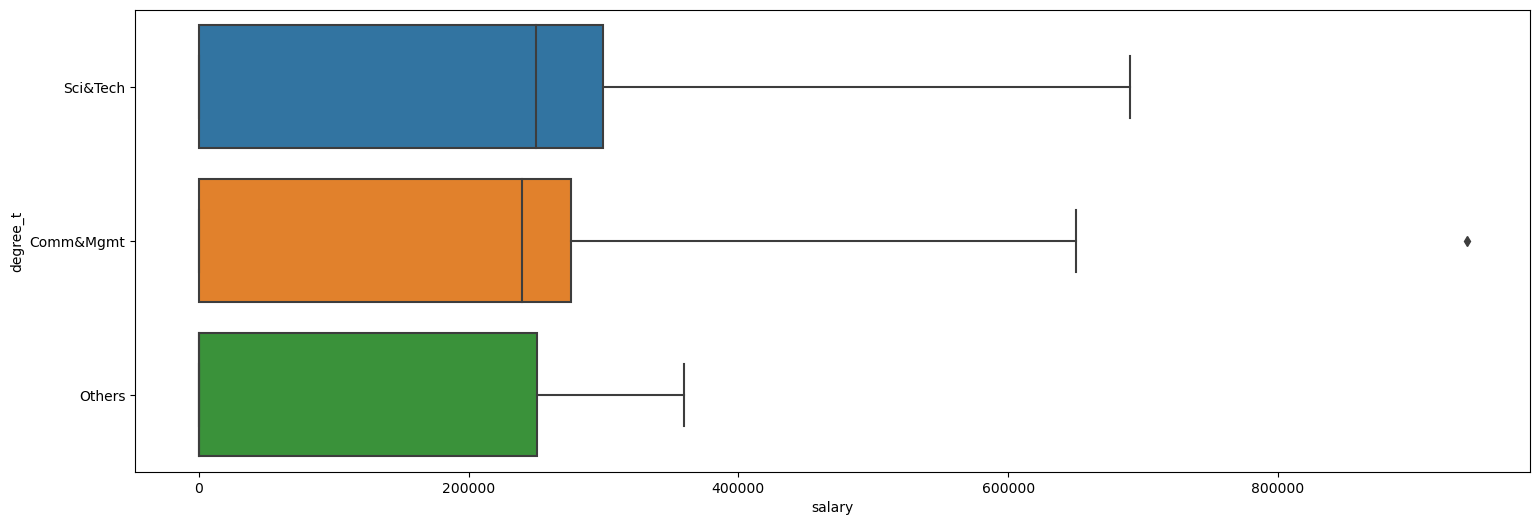

In [25]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df,x='salary',y='degree_t')

<AxesSubplot:xlabel='degree_p', ylabel='salary'>

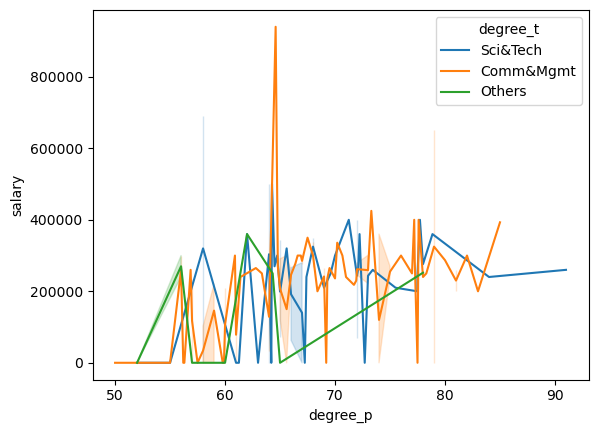

In [26]:
sns.lineplot(data=df,x='degree_p',y='salary',hue='degree_t')

**Insights**
* Students with 'Comm & mgmt' degree secured are getting high paid jobs
* No specific correlation between Secondary Education Percentage and Salary.

### Post Graduation

<AxesSubplot:xlabel='specialisation', ylabel='count'>

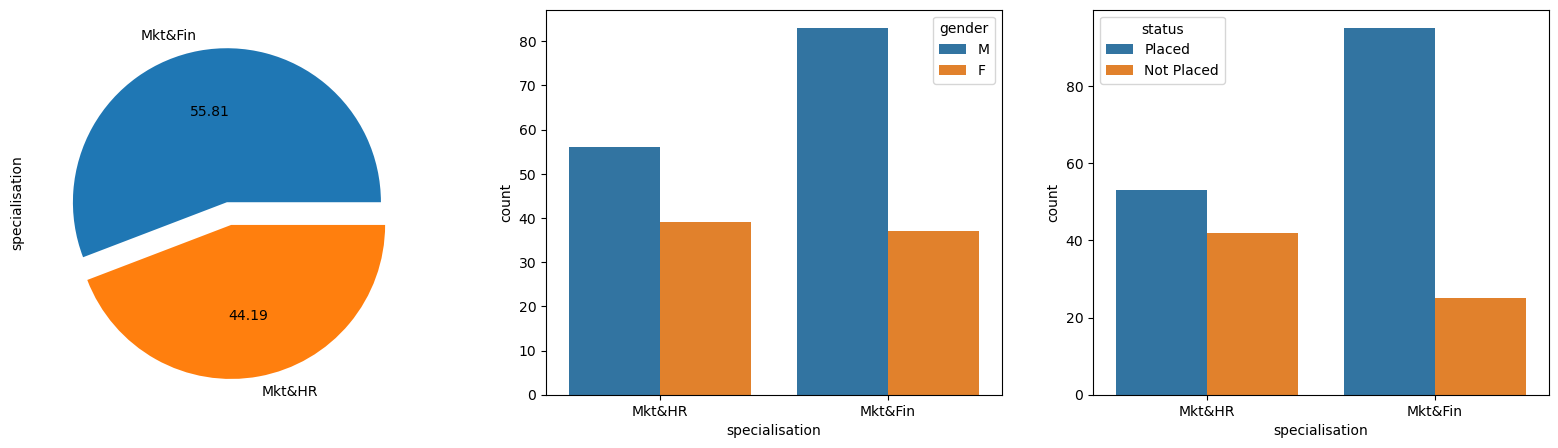

In [27]:
plt.figure(figsize = (20,5))
explode = [0,0.15]
plt.subplot(131)
df['specialisation'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'specialisation',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'specialisation',hue =df['status'])

**Insights**
* Students are from 2 types of Post Graduation Degree: Mkt&HR ~ 55% and Mkt&Fin ~ 45%
* Male students are more interested in Marketing & Finance.
* Marketing & Finance students are placed more.

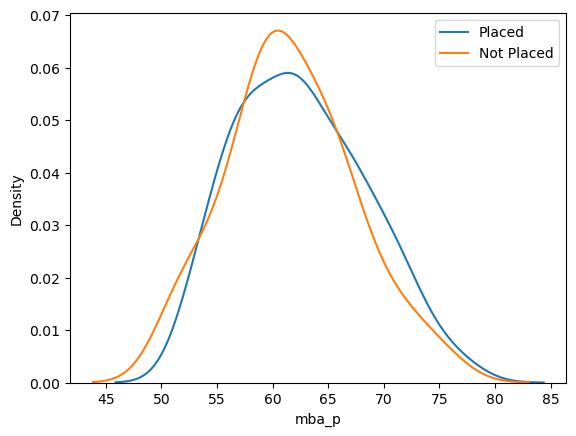

In [28]:
sns.kdeplot(df.mba_p[df.status=="Placed"])
sns.kdeplot(df.mba_p[df.status=="Not Placed"])
plt.legend(['Placed','Not Placed'])

**Insight**
* PG Percentage doesn't affect Placement Status

<AxesSubplot:xlabel='salary', ylabel='specialisation'>

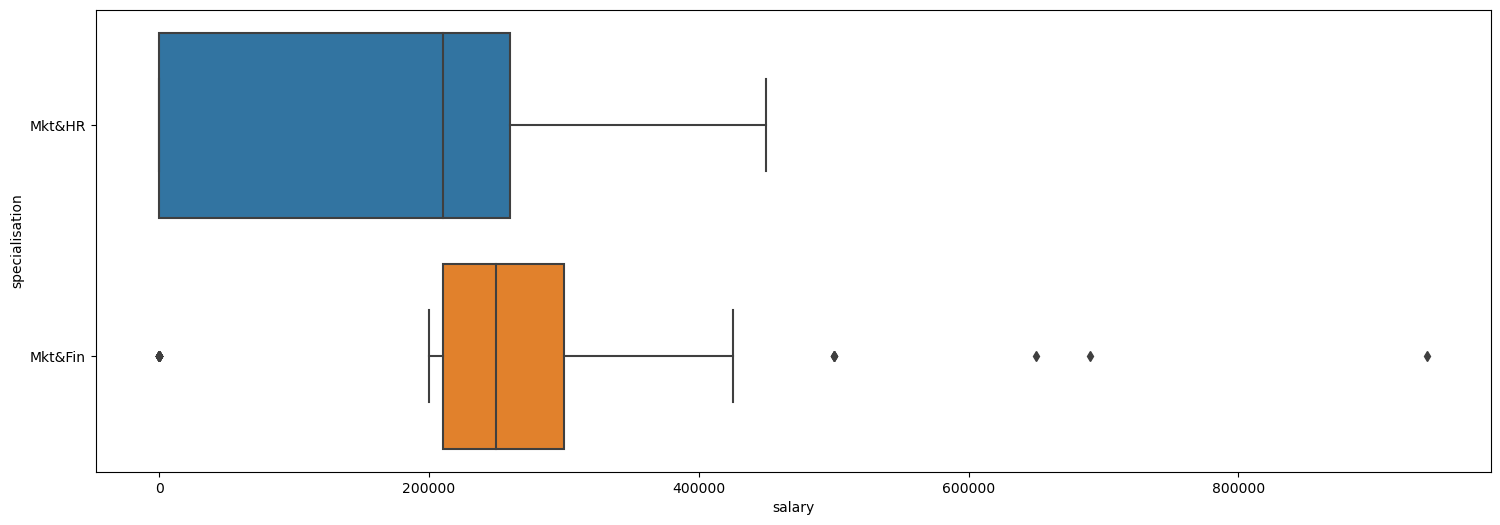

In [29]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df,x='salary',y='specialisation')

<AxesSubplot:xlabel='mba_p', ylabel='salary'>

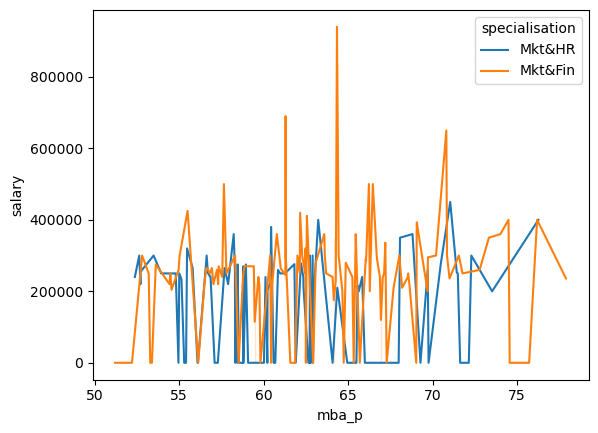

In [30]:
sns.lineplot(data=df,x='mba_p',y='salary',hue='specialisation')

**Insights**
* Highly Paid Jobs for Mkt&Fin students
* PG Percentage doesn't affect salary much

### Work Experience

<AxesSubplot:xlabel='workex', ylabel='count'>

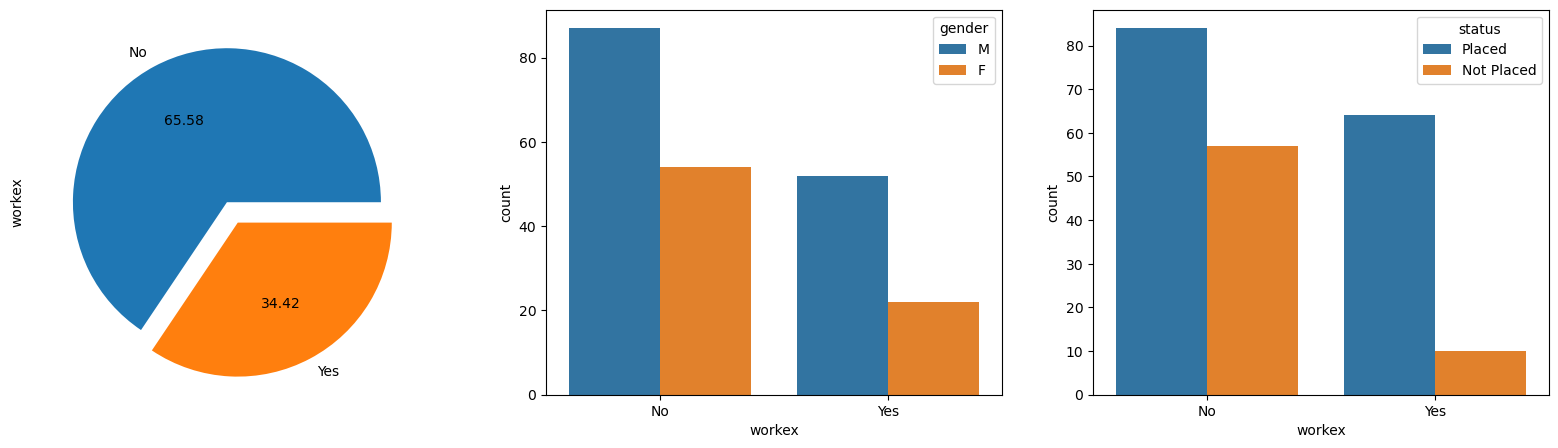

In [31]:
plt.figure(figsize = (20,5))
explode = [0,0.15]
plt.subplot(131)
df['workex'].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
plt.subplot(132)
sns.countplot(data = df, x = 'workex',hue =df['gender'])
plt.subplot(133)
sns.countplot(data = df, x = 'workex',hue =df['status'])

**Insights**
* 35% of students have work experience 
* Students with work experience have hign chance of placement

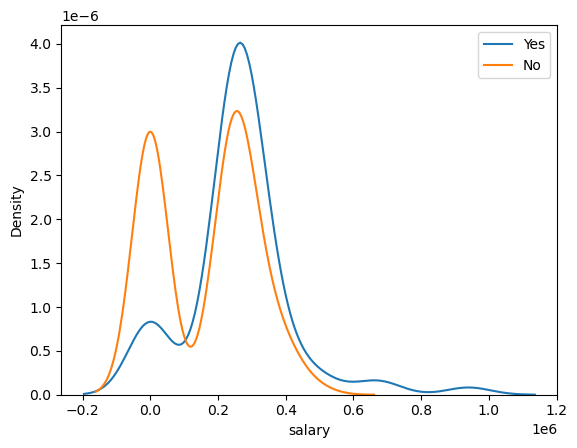

In [32]:
sns.kdeplot(df.salary[df.workex=='Yes'])
sns.kdeplot(df.salary[df.workex=='No'])
plt.legend(['Yes','No'])

<AxesSubplot:xlabel='salary', ylabel='workex'>

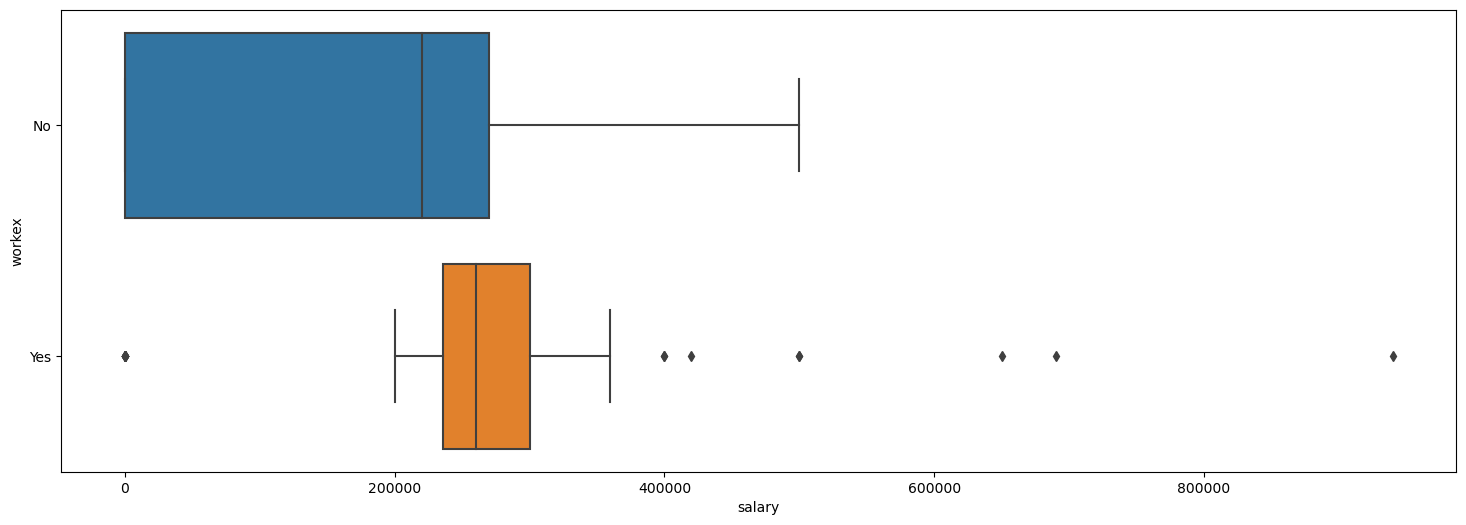

In [33]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df,x='salary',y='workex')

**Insight**
* Students with work experience are getting high paid jobs

### Placement Status

<AxesSubplot:xlabel='status', ylabel='count'>

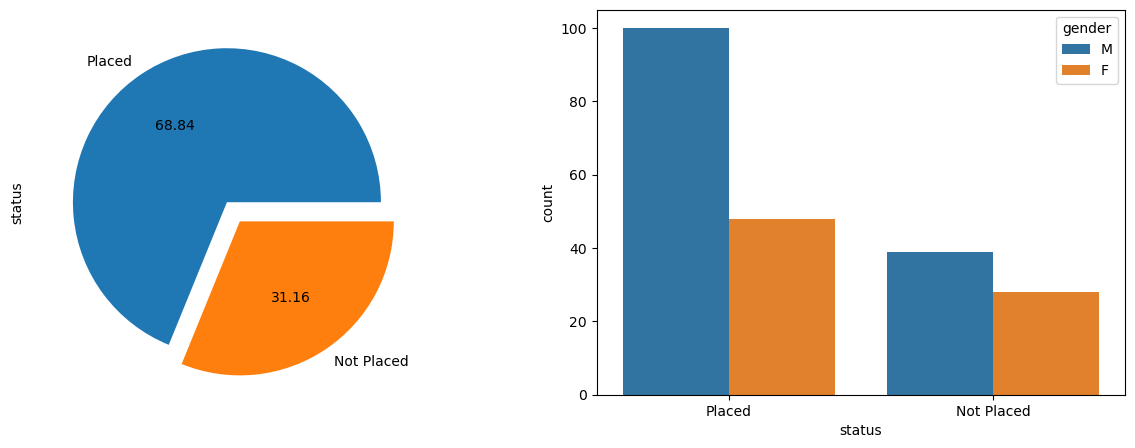

In [34]:
plt.figure(figsize = (15,5))
explode = [0,0.15]
plt.subplot(121)
df['status'].value_counts().plot(kind ='pie',autopct = '%.2f',explode =explode)
plt.subplot(122)
sns.countplot(data = df, x = 'status', hue = df['gender'])

**Insight**
* Male Students are placed almost double than Female Students

<AxesSubplot:>

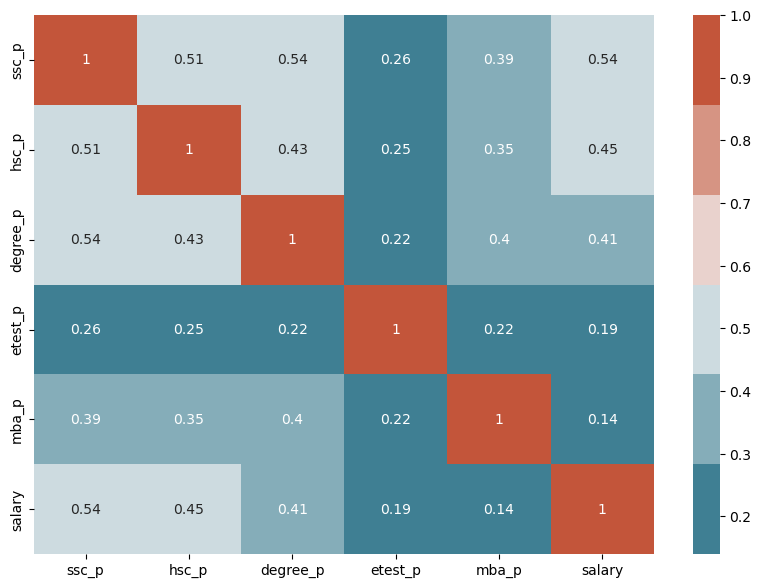

In [35]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 20)
sns.heatmap(corr, annot=True, cmap=cmap)

<AxesSubplot:xlabel='degree_p', ylabel='hsc_p'>

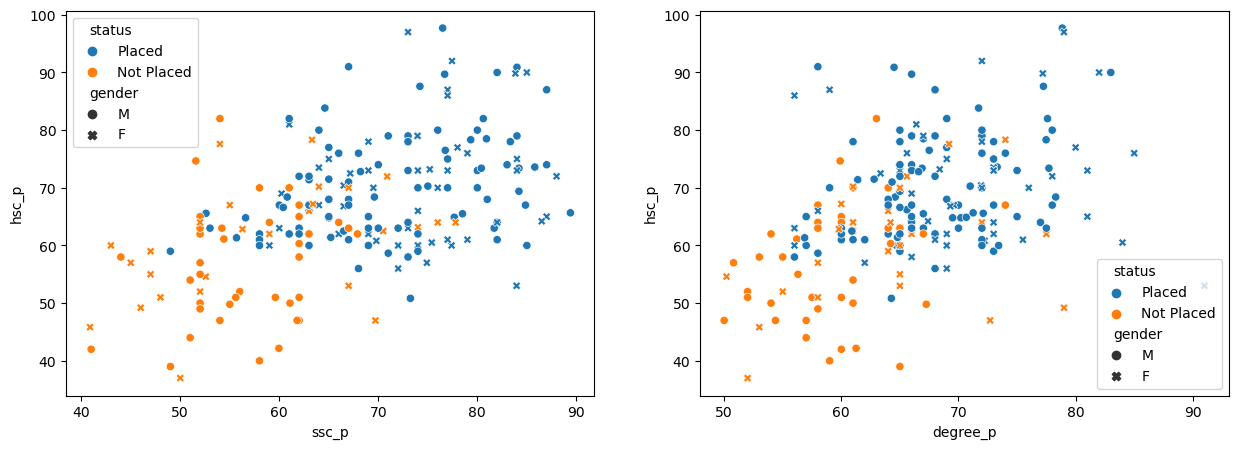

In [36]:
fig = plt.figure(figsize = (15,5))
plt.subplot(121)
sns.scatterplot(data =df, x ='ssc_p' , y='hsc_p',hue = 'status',style = 'gender')
plt.subplot(122)
sns.scatterplot(data =df, x ='degree_p' , y='hsc_p',hue = 'status',style = 'gender')

**Insights**
* Secondary Percentage has correlation with Higher Secondary Percentage and UG Percentage
* Student who scored more in SSC also scored high percentage in HSC and Degree
* Students with high percentage in SSC, HSC and Degree have a high chance of getting placed

### Employability Test Percentage

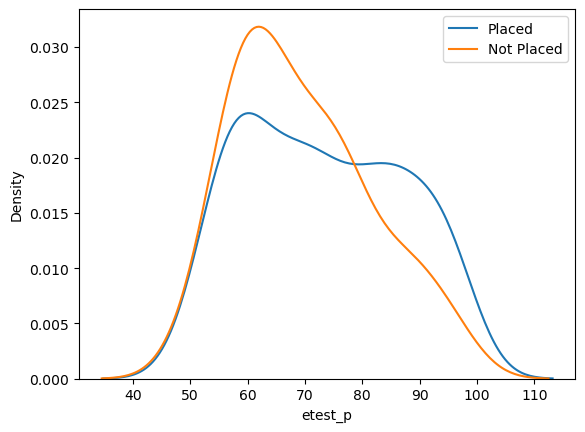

In [37]:
sns.kdeplot(df.etest_p[df.status=='Placed'])
sns.kdeplot(df.etest_p[df.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])

<AxesSubplot:xlabel='etest_p', ylabel='salary'>

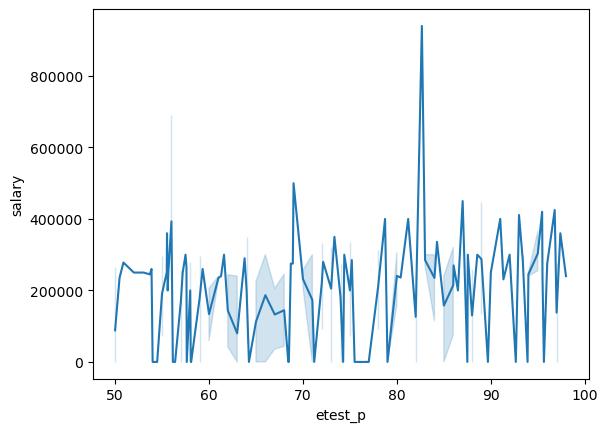

In [38]:
sns.lineplot(data=df,x='etest_p',y='salary')

**Insights**
* More students with Percentage in 50-70 range are not placed
* More students with Percentage above 80 are placed on 80% percentage range
* Employability Test Percentage doesn't affect Placement Status and Salary

<AxesSubplot:xlabel='specialisation-degree_t-hsc_s', ylabel='gender-status'>

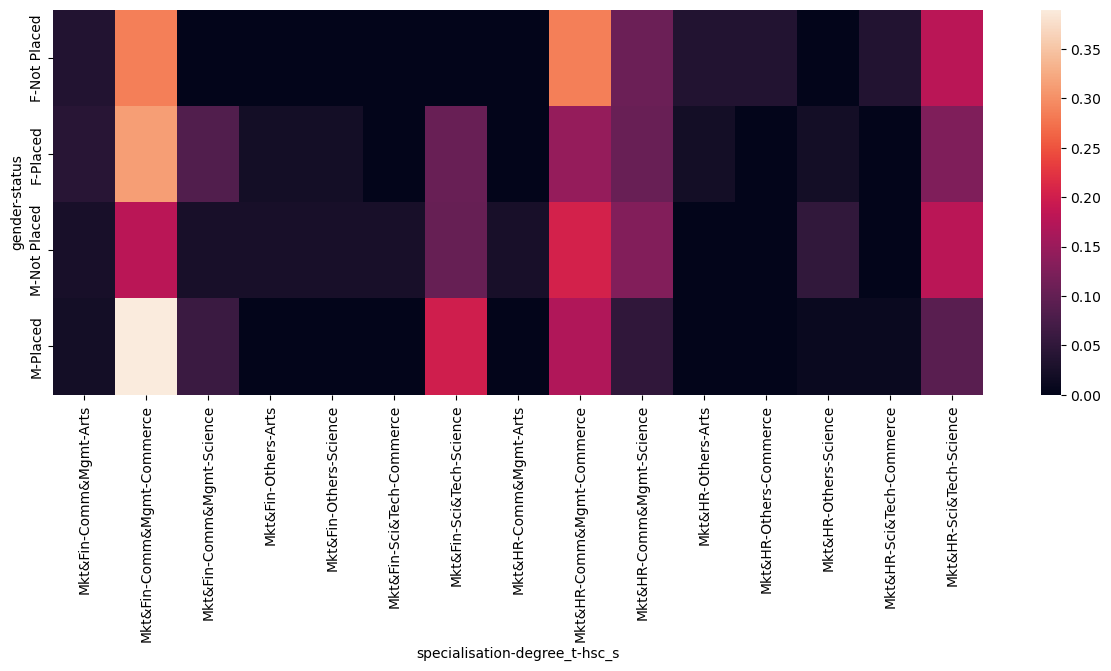

In [39]:
plt.figure(figsize = (15,5))
map= pd.crosstab([df['gender'] , df['status']],[df['specialisation'],df['degree_t'],df['hsc_s']], normalize = 'index')
sns.heatmap(map)

**Insights**
* Criterion for a student to get high chance of placement:
    * Higher Secondary Education Specialization - Commerce
    * Under Graduation Degree type - Comm&Mgmt 
    * Post Graduation Specialization - Mkt&Fin

**Selected Features**
* Gender -> F, M
* Secondary Education Percentage
* Higher Secondary Education Specialization -> Science, Commerce, Arts
* Higher Secondary Education Percentage
* Under Graduation Degree -> Sci&Tech, Comm&Mgmt, Others
* Under Graduation Percentage
* Post Graduation Specialization -> Mkt&HR, Mkt&Fin
* Post Graduation Percentage
* Work Experience -> Yes, No
* Employability test percentage
* Placement Status -> Placed, Not Placed
* Salary

In [40]:
df.drop(['ssc_b','hsc_b'],axis=1,inplace=True)
df

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [41]:
df.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

# Data Pre-processing

## Handling Outliers

In [42]:
numcol=df.select_dtypes(include =["float64"])
numcol

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0
213,74.00,66.00,58.00,70.0,60.23,204000.0


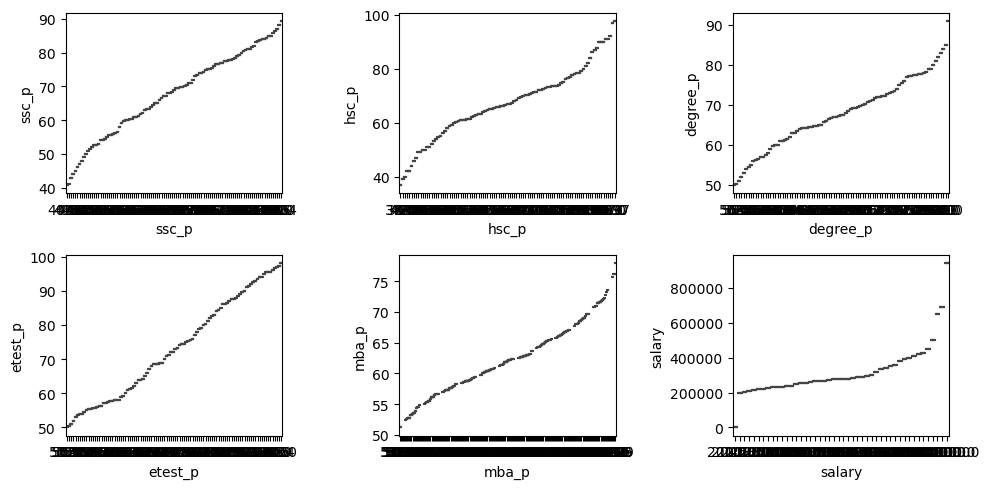

In [43]:
j =1
fig = plt.figure(figsize=(10,5))
for i in ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']:
    plt.subplot(2,3,j)
    sns.boxplot(df[i],y=df[i])
    j=j+1
plt.tight_layout()

In [44]:
for i in numcol:
    df[i]= winsorize(df[i],limits=[0.1,0.1])

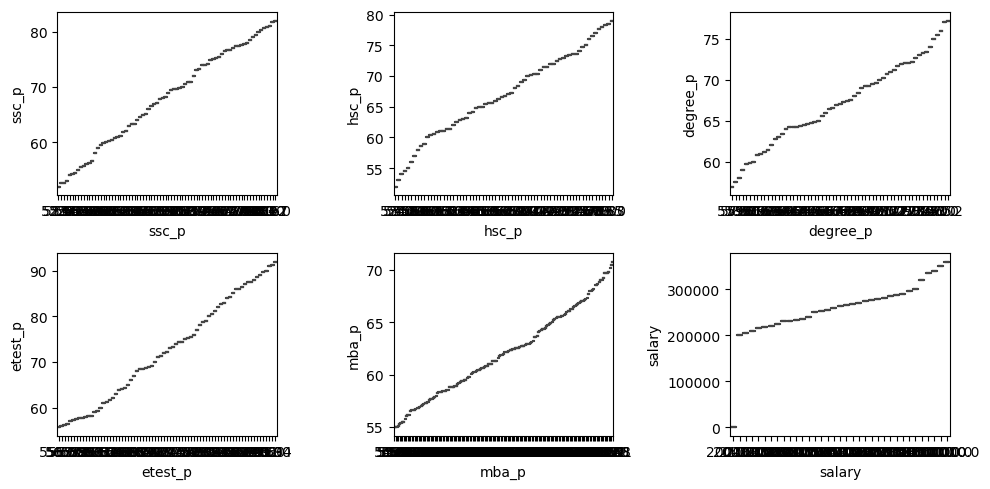

In [45]:
j =1
fig = plt.figure(figsize=(10,5))
for i in ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']:
    plt.subplot(2,3,j)
    sns.boxplot(df[i],y=df[i])
    j=j+1
plt.tight_layout()

**Insight**
* HSC Percentage, Degree Percentage and Salary columns contain outliers

## Handling Categorical Values (One Hot Encoding)

In [46]:
cat_col = df.select_dtypes(include =["object"])
cat_col

,gender,hsc_s,degree_t,workex,specialisation,status
0,M,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...
210,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [47]:
data = pd.get_dummies(df , columns = cat_col.columns ,drop_first=False)
data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,0,1
3,56.00,52.00,57.0,66.00,59.43,0.0,0,1,0,0,1,0,0,1,1,0,0,1,1,0
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,0,1
213,74.00,66.00,58.0,70.00,60.23,204000.0,1,0,0,1,0,1,0,0,1,0,0,1,0,1


In [48]:
data_final=data.drop('status_Not Placed',axis=1)
data_final

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,1
3,56.00,52.00,57.0,66.00,59.43,0.0,0,1,0,0,1,0,0,1,1,0,0,1,0
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,1
213,74.00,66.00,58.0,70.00,60.23,204000.0,1,0,0,1,0,1,0,0,1,0,0,1,1


# Problem Statement
* Predicting if students get placed or not (Binary Classification Problem)
* Predicting Salary of placed student (Regression Problem)

## Binary Classification Problem

In [49]:
data_clf=data_final.copy()
data_clf

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,1
3,56.00,52.00,57.0,66.00,59.43,0.0,0,1,0,0,1,0,0,1,1,0,0,1,0
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,1
213,74.00,66.00,58.0,70.00,60.23,204000.0,1,0,0,1,0,1,0,0,1,0,0,1,1


### Splitting Dataset

#### Independent Variables

In [50]:
X=data_clf.drop(['salary','status_Placed'],axis=1)
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,79.00,58.0,55.67,58.80,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.2,86.50,66.28,0,1,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.0,75.00,57.80,0,1,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,57.0,66.00,59.43,0,1,0,0,1,0,0,1,1,0,0,1
4,82.00,73.60,73.3,92.00,55.50,0,1,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,79.00,77.2,91.00,70.81,0,1,0,1,0,1,0,0,1,0,1,0
211,58.00,60.00,72.0,74.00,54.97,0,1,0,0,1,0,0,1,1,0,1,0
212,67.00,67.00,73.0,59.00,69.72,0,1,0,1,0,1,0,0,0,1,1,0
213,74.00,66.00,58.0,70.00,60.23,1,0,0,1,0,1,0,0,1,0,0,1


#### Dependent Variable

In [51]:
y=data_clf['status_Placed']
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status_Placed, Length: 215, dtype: uint8

#### Train and Test Data

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [53]:
X_train

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
46,70.89,71.98,65.60,68.00,70.81,1,0,0,0,1,1,0,0,1,0,0,1
48,63.00,62.00,68.00,64.00,62.46,0,1,0,1,0,1,0,0,1,0,1,0
201,54.20,63.00,58.00,79.00,58.44,0,1,0,0,1,1,0,0,1,0,0,1
110,69.50,70.00,72.00,57.20,54.97,1,0,0,0,1,0,0,1,1,0,0,1
21,79.00,76.00,77.20,92.00,69.06,1,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,73.00,78.00,73.00,85.00,65.83,0,1,0,0,1,0,0,1,0,1,0,1
73,64.60,79.00,71.72,86.00,59.75,0,1,0,1,0,1,0,0,1,0,1,0
175,63.00,62.00,65.00,87.50,60.69,0,1,0,0,1,0,0,1,1,0,0,1
30,64.00,73.50,73.00,55.67,56.70,1,0,0,1,0,1,0,0,1,0,0,1


In [54]:
X_test

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
189,54.00,77.60,69.2,92.0,66.94,1,0,0,1,0,1,0,0,1,0,1,0
213,74.00,66.00,58.0,70.0,60.23,1,0,0,1,0,1,0,0,1,0,0,1
136,52.00,59.00,64.0,78.0,61.58,1,0,1,0,0,1,0,0,1,0,1,0
148,77.00,79.00,57.0,57.0,64.08,1,0,1,0,0,0,1,0,1,0,1,0
203,55.68,61.33,57.0,66.0,58.30,0,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,52.00,55.00,65.0,62.0,65.04,1,0,0,0,1,1,0,0,1,0,0,1
123,74.00,59.00,73.0,60.0,56.70,0,1,0,1,0,1,0,0,0,1,0,1
191,67.00,61.00,72.0,72.0,61.01,0,1,0,0,1,1,0,0,1,0,1,0
40,78.00,77.00,77.2,60.0,66.72,1,0,0,1,0,1,0,0,1,0,1,0


In [55]:
y_train

46     0
48     1
201    0
110    1
21     1
      ..
103    1
73     1
175    0
30     1
107    1
Name: status_Placed, Length: 150, dtype: uint8

In [56]:
y_test

189    0
213    1
136    0
148    1
203    1
      ..
12     0
123    1
191    1
40     1
41     0
Name: status_Placed, Length: 65, dtype: uint8

### Model Building

#### Ada Boost Classifier

In [57]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [58]:
y_pred = abc.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
      dtype=uint8)

In [59]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", abc.score (X_train, y_train), "\nTest score:",abc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, abc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.84      0.95      0.89        39

    accuracy                           0.86        65
   macro avg       0.87      0.84      0.85        65
weighted avg       0.87      0.86      0.86        65

Confusion Matrix
 [[19  7]
 [ 2 37]]

Train score: 1.0 
Test score: 0.8615384615384616

Accuracy Score: 86.15%


#### Random Forest Classifier

In [60]:
rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
      dtype=uint8)

In [62]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", rfc.score (X_train, y_train), "\nTest score:",rfc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, rfc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.58      0.67        26
           1       0.76      0.90      0.82        39

    accuracy                           0.77        65
   macro avg       0.78      0.74      0.75        65
weighted avg       0.77      0.77      0.76        65

Confusion Matrix
 [[15 11]
 [ 4 35]]

Train score: 1.0 
Test score: 0.7692307692307693

Accuracy Score: 76.92%


In [63]:
params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_iter=10, scoring='accuracy', random_state=42)
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [64]:
rfc_best_model = rfc_cv.best_estimator_
rfc_best_model

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [65]:
predictions = rfc_best_model.predict(X)
predictions

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=uint8)

In [66]:
print("Classification Report:\n")
print(classification_report(y, predictions))
print("\nBest Hyperparameters: ", rfc_cv.best_params_)
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, rfc_cv.predict(X_test)) * 100.0))
print("Best Score: %.2f%%" % (rfc_cv.best_score_ * 100.0))

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.72      0.81        67
           1       0.88      0.98      0.93       148

    accuracy                           0.90       215
   macro avg       0.91      0.85      0.87       215
weighted avg       0.90      0.90      0.89       215


Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}

Accuracy Score: 78.46%
Best Score: 90.00%


#### Decision Tree Classifier

In [67]:
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [68]:
y_pred=dtc.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
      dtype=uint8)

In [69]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", dtc.score (X_train, y_train), "\nTest score:",dtc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, dtc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.85      0.79        26
           1       0.89      0.79      0.84        39

    accuracy                           0.82        65
   macro avg       0.81      0.82      0.81        65
weighted avg       0.82      0.82      0.82        65

Confusion Matrix
 [[22  4]
 [ 8 31]]

Train score: 1.0 
Test score: 0.8153846153846154

Accuracy Score: 81.54%


#### K Nearest Neighbors Classifier

In [70]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
y_pred = knc.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      dtype=uint8)

In [72]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", knc.score (X_train, y_train), "\nTest score:",knc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, knc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.80      0.95      0.87        39

    accuracy                           0.83        65
   macro avg       0.85      0.80      0.81        65
weighted avg       0.84      0.83      0.82        65

Confusion Matrix
 [[17  9]
 [ 2 37]]

Train score: 0.8666666666666667 
Test score: 0.8307692307692308

Accuracy Score: 83.08%


#### XGBoost Classifier

In [73]:
xbc = xgb.XGBClassifier()
xbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
y_pred = xbc.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [75]:
print("Classification Report\n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
print("\nTrain score:", xbc.score (X_train, y_train), "\nTest score:",xbc.score (X_test, y_test))
print("\nAccuracy Score: %.2f%%" % (accuracy_score(y_test, xbc.predict(X_test)) * 100.0))

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.80      0.90      0.84        39

    accuracy                           0.80        65
   macro avg       0.80      0.78      0.78        65
weighted avg       0.80      0.80      0.80        65

Confusion Matrix
 [[17  9]
 [ 4 35]]

Train score: 1.0 
Test score: 0.8

Accuracy Score: 80.00%


## Regression Problem

In [76]:
data_reg=data_final[data_final['status_Placed'] == 1 ]
data_reg

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,67.00,79.00,58.0,55.67,58.80,270000.0,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.2,86.50,66.28,200000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.00,68.00,64.0,75.00,57.80,250000.0,0,1,1,0,0,1,0,0,1,0,1,0,1
4,82.00,73.60,73.3,92.00,55.50,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
7,82.00,64.00,66.0,67.00,62.14,252000.0,0,1,0,0,1,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,62.00,72.00,65.0,67.00,56.49,216000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
210,80.60,79.00,77.2,91.00,70.81,360000.0,0,1,0,1,0,1,0,0,1,0,1,0,1
211,58.00,60.00,72.0,74.00,54.97,275000.0,0,1,0,0,1,0,0,1,1,0,1,0,1
212,67.00,67.00,73.0,59.00,69.72,295000.0,0,1,0,1,0,1,0,0,0,1,1,0,1


### Splitting Dataset

<AxesSubplot:xlabel='status_Placed', ylabel='Density'>

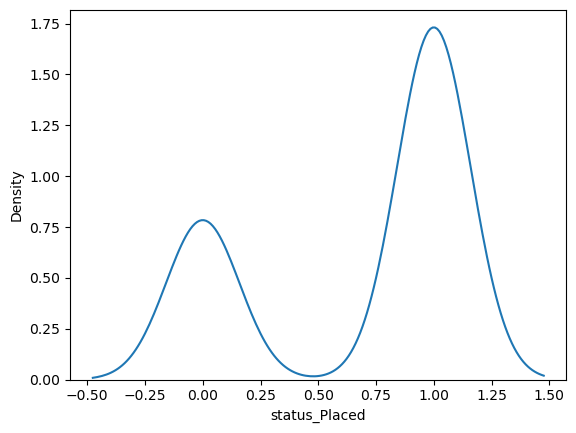

In [77]:
sns.kdeplot(y)

Very few students have salary greater than 400,000 (hence outliers)

#### Independent Variables

In [78]:
X=data_reg[data_reg['salary']<400000]
X=X.drop(['salary','status_Placed'],axis=1)
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,79.00,58.0,55.67,58.80,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.2,86.50,66.28,0,1,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.0,75.00,57.80,0,1,1,0,0,1,0,0,1,0,1,0
4,82.00,73.60,73.3,92.00,55.50,0,1,0,1,0,1,0,0,1,0,1,0
7,82.00,64.00,66.0,67.00,62.14,0,1,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,62.00,72.00,65.0,67.00,56.49,0,1,0,1,0,1,0,0,1,0,1,0
210,80.60,79.00,77.2,91.00,70.81,0,1,0,1,0,1,0,0,1,0,1,0
211,58.00,60.00,72.0,74.00,54.97,0,1,0,0,1,0,0,1,1,0,1,0
212,67.00,67.00,73.0,59.00,69.72,0,1,0,1,0,1,0,0,0,1,1,0


#### Dependent Variable

In [79]:
y=data_reg['salary']
y

0      270000.0
1      200000.0
2      250000.0
4      360000.0
7      252000.0
         ...   
209    216000.0
210    360000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64

#### Handling Outliers

In [80]:
y=y[y< 400000]
y

0      270000.0
1      200000.0
2      250000.0
4      360000.0
7      252000.0
         ...   
209    216000.0
210    360000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64

#### Train and Test Data

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [82]:
X_train

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
95,73.0,78.0,65.0,92.00,62.16,0,1,0,1,0,1,0,0,0,1,1,0
160,82.0,74.0,65.0,75.00,70.81,0,1,0,0,1,0,0,1,0,1,0,1
7,82.0,64.0,66.0,67.00,62.14,0,1,0,0,1,0,0,1,0,1,1,0
39,81.0,68.0,64.0,92.00,62.56,0,1,0,0,1,0,0,1,1,0,1,0
126,79.0,61.0,75.5,70.00,68.20,1,0,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,69.0,63.0,65.0,55.67,58.23,0,1,0,0,1,1,0,0,0,1,0,1
122,66.5,66.8,69.3,80.40,70.81,1,0,1,0,0,1,0,0,0,1,1,0
178,68.0,56.0,68.0,73.00,68.07,0,1,0,0,1,0,0,1,1,0,0,1
86,62.0,63.0,64.0,67.00,57.03,0,1,0,1,0,1,0,0,1,0,1,0


In [83]:
X_test

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
32,61.00,79.00,66.40,55.67,62.21,1,0,0,1,0,1,0,0,1,0,0,1
24,76.50,79.00,77.20,92.00,70.81,0,1,0,0,1,0,0,1,1,0,1,0
124,67.00,71.00,64.33,64.00,61.26,0,1,0,0,1,0,1,0,0,1,0,1
96,76.00,70.00,76.00,66.00,64.44,1,0,0,0,1,1,0,0,0,1,1,0
60,74.00,70.00,72.00,60.00,57.24,0,1,0,0,1,1,0,0,0,1,1,0
102,77.00,61.00,68.00,57.50,61.31,1,0,0,1,0,1,0,0,0,1,1,0
98,69.00,73.00,65.00,70.00,57.31,1,0,0,1,0,1,0,0,1,0,1,0
123,74.00,59.00,73.00,60.00,56.70,0,1,0,1,0,1,0,0,0,1,0,1
133,73.00,64.00,77.00,65.00,60.98,0,1,0,1,0,1,0,0,0,1,0,1
147,70.00,74.00,65.00,83.00,62.28,0,1,0,1,0,1,0,0,1,0,1,0


In [84]:
y_train

95     360000.0
160    300000.0
7      252000.0
39     360000.0
126    210000.0
         ...   
104    360000.0
122    236000.0
178    350000.0
86     220000.0
30     250000.0
Name: salary, Length: 103, dtype: float64

In [85]:
y_test

32     278000.0
24     360000.0
124    250000.0
96     300000.0
60     260000.0
102    300000.0
98     220000.0
123    240000.0
133    250000.0
147    300000.0
72     240000.0
13     218000.0
113    280000.0
90     300000.0
127    250000.0
26     240000.0
204    210000.0
177    360000.0
203    260000.0
62     240000.0
205    250000.0
73     218000.0
89     210000.0
112    250000.0
174    360000.0
44     200000.0
211    275000.0
125    350000.0
77     360000.0
74     336000.0
47     204000.0
148    240000.0
207    300000.0
67     275000.0
15     200000.0
210    360000.0
200    300000.0
11     250000.0
196    250000.0
20     265000.0
22     360000.0
55     220000.0
108    300000.0
10     260000.0
183    276000.0
Name: salary, dtype: float64

### Model Building

#### Linear Regression

In [86]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [87]:
y_pred=lr.predict(X_test)
y_pred

array([239471.3159617 , 301872.25232887, 320548.4773202 , 236570.83310284,
       254145.2788026 , 252641.63015128, 251616.16058147, 266312.68887818,
       269084.29842966, 290105.1952255 , 279361.47849667, 268645.6638662 ,
       257615.87648556, 268082.66181793, 223107.3905298 , 293950.87353961,
       266141.09594625, 270010.23321252, 276361.39739222, 257356.9040909 ,
       270118.51656967, 281159.55231316, 259656.26129805, 265206.85427901,
       297541.90204765, 270846.45356909, 276285.00388407, 264589.67792033,
       285829.67887964, 287759.91165931, 290480.52245257, 288657.34168726,
       312752.38604609, 280947.77047875, 258800.1562495 , 295006.77157744,
       287119.49685701, 270289.33610722, 282008.91941529, 261653.32399147,
       252816.58258173, 254024.86364606, 279869.05733115, 278262.59094829,
       266204.07345898])

In [88]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  40041.3871902699
Mean Squared Error (MSE):  2296395225.2526097
Root Mean Squared Error (RMSE):  47920.71812121152
R-squared (R2) score:  0.01742145919589766
Accuracy Score: 2.00%


In [89]:
scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2210420205.5006256
Standard Deviation MSE: 720838726.846774


#### Random Forest Regression

In [90]:
rfr = RandomForestRegressor(n_estimators=200, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [91]:
y_pred = rfr.predict(X_test)
y_pred

array([269730., 267375., 285515., 238055., 263380., 243840., 248255.,
       274650., 263605., 321340., 296540., 270435., 286235., 293665.,
       231325., 278765., 268815., 268420., 248835., 249685., 238850.,
       263260., 279745., 249740., 303640., 281315., 274495., 301265.,
       275160., 282285., 295050., 288415., 308165., 279900., 286155.,
       281310., 288595., 282770., 269820., 247905., 241195., 257380.,
       276845., 270370., 277855.])

In [92]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  38842.0
Mean Squared Error (MSE):  2470317234.4444447
Root Mean Squared Error (RMSE):  49702.286008235526
R-squared (R2) score:  -0.056996059237425234
Accuracy Score: -6.00%


In [93]:
scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2197527097.3448277
Standard Deviation MSE: 660917731.6490362


In [94]:
rfr_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
}
rfr_grid_search = GridSearchCV(RandomForestRegressor(), rfr_param_grid, cv=5)
rfr_grid_search.fit(X_train, y_train)
print(f"Best hyperparameters: {rfr_grid_search.best_params_}")
print(f"Best R2 score: {rfr_grid_search.best_score_:.4f}")

Best hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best R2 score: 0.0664


In [95]:
scores = cross_val_score(rfr_grid_search, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2153672977.3643975
Standard Deviation MSE: 620680727.758997


#### Decision Tree Regression

In [96]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [97]:
y_pred = dtr.predict(X_test)
y_pred

array([320000., 360000., 260000., 200000., 216000., 200000., 250000.,
       360000., 260000., 360000., 260000., 287000., 350000., 200000.,
       200000., 250000., 360000., 300000., 360000., 210000., 216000.,
       275000., 320000., 240000., 360000., 300000., 360000., 360000.,
       265000., 240000., 300000., 287000., 360000., 270000., 285000.,
       360000., 300000., 290000., 360000., 250000., 250000., 300000.,
       360000., 260000., 300000.])

In [98]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  55644.444444444445
Mean Squared Error (MSE):  4744622222.222222
Root Mean Squared Error (RMSE):  68881.2182109334
R-squared (R2) score:  -1.0301226585528194
Accuracy Score: -103.00%


In [99]:
scores = cross_val_score(dtr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 5085850574.712644
Standard Deviation MSE: 1525510621.3624177


####  K - Nearest Neighbour Regression

In [100]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [101]:
y_pred = knr.predict(X_test)
y_pred

array([253000., 265200., 257200., 259400., 244000., 248000., 252200.,
       253000., 236800., 319000., 294000., 285000., 282000., 277200.,
       273000., 283200., 297000., 265200., 239000., 258400., 254000.,
       293200., 261000., 248000., 278000., 287200., 249800., 302400.,
       274200., 313200., 283000., 272000., 274000., 283000., 281000.,
       257200., 263800., 252000., 263600., 287000., 251000., 236200.,
       317200., 248000., 242200.])

In [102]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  40440.0
Mean Squared Error (MSE):  2620047111.111111
Root Mean Squared Error (RMSE):  51186.39576206857
R-squared (R2) score:  -0.12106228011790443
Accuracy Score: -12.00%


In [103]:
scores = cross_val_score(knr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 2602240174.7126436
Standard Deviation MSE: 324263023.4849141


#### XGBoost Regression

In [104]:
xbr = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [105]:
y_pred = xbr.predict(X_test)
y_pred

array([254401.8 , 230424.72, 256728.75, 232731.3 , 259901.34, 258768.53,
       243107.03, 257540.3 , 259295.19, 360535.28, 358057.56, 235275.4 ,
       299230.56, 293729.94, 218384.14, 252859.88, 245844.64, 270214.53,
       224380.39, 261404.3 , 248640.4 , 255999.7 , 299269.  , 254371.36,
       293585.62, 251115.62, 258860.14, 301163.03, 251818.47, 282756.47,
       268656.9 , 254152.52, 301425.6 , 279041.12, 284346.22, 259437.31,
       288137.56, 298374.34, 261163.22, 252620.47, 251610.64, 250933.48,
       274184.2 , 270575.16, 264917.25], dtype=float32)

In [106]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)
print("Accuracy Score: %.2f%%" % (round(r2,2) * 100.0))

Mean Absolute Error (MAE):  39636.33090277778
Mean Squared Error (MSE):  2816116953.2790637
Root Mean Squared Error (RMSE):  53067.09859488329
R-squared (R2) score:  -0.2049563839265749
Accuracy Score: -20.00%


In [107]:
scores = cross_val_score(xbr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 3008922990.0531907
Standard Deviation MSE: 692020284.8927656


# Prediction Result

In [108]:
def predict_salary(gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p):
    gender_i=np.where(X.columns==gender)[0][0]
    hsc_s_i=np.where(X.columns==hsc_s)[0][0]
    degree_t_i=np.where(X.columns==degree_t)[0][0]
    specialisation_i=np.where(X.columns==specialisation)[0][0]
    workex_i=np.where(X.columns==workex)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=ssc_p
    x[1]=hsc_p
    x[2]=degree_p
    x[3]=etest_p
    x[4]=mba_p
    if gender_i>=0:
        x[gender_i]=1
    if hsc_s_i>=0:
        x[hsc_s_i]=1
    if degree_t_i>=0:
        x[degree_t_i]=1
    if specialisation_i>=0:
        x[specialisation_i]=1
    if workex_i>=0:
        x[workex_i]=1
    salary=round((lr.predict([x])[0])/100000,2)
    print("Estimated Salary is:",salary,"LPA")
def predict_status(gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p):
    gender_i=np.where(X.columns==gender)[0][0]
    hsc_s_i=np.where(X.columns==hsc_s)[0][0]
    degree_t_i=np.where(X.columns==degree_t)[0][0]
    specialisation_i=np.where(X.columns==specialisation)[0][0]
    workex_i=np.where(X.columns==workex)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=ssc_p
    x[1]=hsc_p
    x[2]=degree_p
    x[3]=etest_p
    x[4]=mba_p
    if gender_i>=0:
        x[gender_i]=1
    if hsc_s_i>=0:
        x[hsc_s_i]=1
    if degree_t_i>=0:
        x[degree_t_i]=1
    if specialisation_i>=0:
        x[specialisation_i]=1
    if workex_i>=0:
        x[workex_i]=1 
    print(x)
    status=rfc_cv.predict([x])[0]
    if(status==1):
        print("The Student is Placed")
        predict_salary(gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p)
    else:
        print("The Student is Not Placed")

In [109]:
predict_status('gender_M',67.00,91.00,'hsc_s_Commerce',58.00,'degree_t_Sci&Tech','workex_No',55.0,'specialisation_Mkt&HR',58.80)

[67.  91.  58.  55.  58.8  0.   1.   0.   1.   0.   0.   0.   1.   1.
  0.   0.   1. ]
The Student is Placed
Estimated Salary is: 2.93 LPA


In [110]:
predict_status('gender_M',56.00,52.00,'hsc_s_Science',52.00,'degree_t_Sci&Tech','workex_No',66.0,'specialisation_Mkt&HR',58.80)

[56.  52.  52.  66.  58.8  0.   1.   0.   0.   1.   0.   0.   1.   1.
  0.   0.   1. ]
The Student is Not Placed


# Model Deployment

In [ ]:
with open("status_rfccv.pickle","wb") as f:
    pickle.dump(rfc_cv,f)

In [ ]:
with open("salary_lr.pickle","wb") as f:
    pickle.dump(lr,f)

# Cloud Deployment

In [59]:
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"jGwxgHaMTFkIvdPyph06O8zeKMnjPDRThbQB-d7z8SEa"
}

In [61]:
client = APIClient(wml_credentials)
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------  ------------------------
ID                                    NAME       CREATED
74a386c1-df02-45d0-874c-1e9b34545a5c  campusIBM  2023-08-19T10:14:03.884Z
------------------------------------  ---------  ------------------------


,ID,NAME,CREATED
0,74a386c1-df02-45d0-874c-1e9b34545a5c,campusIBM,2023-08-19T10:14:03.884Z


In [62]:
space_id = "74a386c1-df02-45d0-874c-1e9b34545a5c"

In [63]:
client.set.default_space(space_id)

'SUCCESS'

In [69]:
spec_id = client.software_specifications.get_id_by_name('runtime-22.2-py3.10')
spec_id

'b56101f1-309d-549b-a849-eaa63f77b2fb'

In [70]:
status_model=client.repository.store_model(model=rfc_cv, meta_props={
    client.repository.ModelMetaNames.NAME:"Campus Placement Status",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:spec_id,
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.1"
})

In [72]:
salary_model=client.repository.store_model(model=lr, meta_props={
    client.repository.ModelMetaNames.NAME:"Campus Placement Salary",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:spec_id,
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.1"
})

In [73]:
client.repository.list()

------------------------------------  -----------------------  ------------------------  ----------------  -----  ----------  ----------------
GUID                                  NAME                     CREATED                   FRAMEWORK         TYPE   SPEC_STATE  SPEC_REPLACEMENT
ee07aca6-3525-4531-a9c0-94b6476bafec  Campus Placement Salary  2023-08-19T10:27:09.002Z  scikit-learn_1.1  model  supported
29f30b92-7482-4d46-b5bb-698a6ef51508  Campus Placement Status  2023-08-19T10:25:32.002Z  scikit-learn_1.1  model  supported
------------------------------------  -----------------------  ------------------------  ----------------  -----  ----------  ----------------


In [74]:
status_model_id = status_model['metadata']['id']
salary_model_id = salary_model['metadata']['id']

In [77]:
status_deployment = client.deployments.create(artifact_uid=status_model_id,meta_props={
    client.deployments.ConfigurationMetaNames.NAME:"Status Deploy",
    client.deployments.ConfigurationMetaNames.ONLINE:{}
})



#######################################################################################

Synchronous deployment creation for uid: '29f30b92-7482-4d46-b5bb-698a6ef51508' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5532712e-20d0-4cc6-801a-5886f037640d'
------------------------------------------------------------------------------------------------




In [78]:
salary_deployment = client.deployments.create(artifact_uid=salary_model_id,meta_props={
    client.deployments.ConfigurationMetaNames.NAME:"Salary Deploy",
    client.deployments.ConfigurationMetaNames.ONLINE:{}
})



#######################################################################################

Synchronous deployment creation for uid: 'ee07aca6-3525-4531-a9c0-94b6476bafec' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='08ec754f-3154-41f5-9980-520c9bf49eff'
------------------------------------------------------------------------------------------------




In [81]:
status_deployment_id=status_deployment['metadata']['id']
status_deployment_id

'5532712e-20d0-4cc6-801a-5886f037640d'

In [83]:
salary_deployment_id=salary_deployment['metadata']['id']
salary_deployment_id

'08ec754f-3154-41f5-9980-520c9bf49eff'